In [1]:
# Carrega as bibliotecas
#!pip install nltk
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simonato\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

In [4]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
# Carregar arquivo de texto
f = open('bozo.txt', 'r')
texto = ''
while 1:
    line = f.readline()
    if not line: break
    texto += line
f.close()

print(texto)
print(type(texto))

"Amigas e amigos de todo o Brasil,

É com humildade e honra que me dirijo a todos vocês como Presidente do Brasil.

E me coloco diante de toda a nação, neste dia, como o dia em que o povo começou a se libertar do socialismo, da inversão de valores, do gigantismo estatal e do politicamente correto.

As eleições deram voz a quem não era ouvido.

E a voz das ruas e das urnas foi muito clara.

E eu estou aqui para responder e, mais uma vez, me comprometer com esse desejo de mudança.

Também estou aqui para renovar nossas esperanças e lembrar que, se trabalharmos juntos, essa mudança será possível.

Respeitando os princípios do estado democrático de direito, guiados por nossa Constituição e com Deus no coração, a partir de hoje, vamos colocar em prática o projeto que a maioria do povo brasileiro democraticamente escolheu, vamos promover as transformações de que o país precisa.

Temos recursos minerais abundantes, terras férteis abençoadas por Deus e um povo maravilhoso.

Temos uma grande na

In [6]:
# Quebra em palavras
tokenized_word = word_tokenize(texto)
print(tokenized_word)

['``', 'Amigas', 'e', 'amigos', 'de', 'todo', 'o', 'Brasil', ',', 'É', 'com', 'humildade', 'e', 'honra', 'que', 'me', 'dirijo', 'a', 'todos', 'vocês', 'como', 'Presidente', 'do', 'Brasil', '.', 'E', 'me', 'coloco', 'diante', 'de', 'toda', 'a', 'nação', ',', 'neste', 'dia', ',', 'como', 'o', 'dia', 'em', 'que', 'o', 'povo', 'começou', 'a', 'se', 'libertar', 'do', 'socialismo', ',', 'da', 'inversão', 'de', 'valores', ',', 'do', 'gigantismo', 'estatal', 'e', 'do', 'politicamente', 'correto', '.', 'As', 'eleições', 'deram', 'voz', 'a', 'quem', 'não', 'era', 'ouvido', '.', 'E', 'a', 'voz', 'das', 'ruas', 'e', 'das', 'urnas', 'foi', 'muito', 'clara', '.', 'E', 'eu', 'estou', 'aqui', 'para', 'responder', 'e', ',', 'mais', 'uma', 'vez', ',', 'me', 'comprometer', 'com', 'esse', 'desejo', 'de', 'mudança', '.', 'Também', 'estou', 'aqui', 'para', 'renovar', 'nossas', 'esperanças', 'e', 'lembrar', 'que', ',', 'se', 'trabalharmos', 'juntos', ',', 'essa', 'mudança', 'será', 'possível', '.', 'Respeita

In [7]:
# Palavras em letras minúsculas
tokenized_word2 = [w.lower() for w in tokenized_word]
print(tokenized_word2)

['``', 'amigas', 'e', 'amigos', 'de', 'todo', 'o', 'brasil', ',', 'é', 'com', 'humildade', 'e', 'honra', 'que', 'me', 'dirijo', 'a', 'todos', 'vocês', 'como', 'presidente', 'do', 'brasil', '.', 'e', 'me', 'coloco', 'diante', 'de', 'toda', 'a', 'nação', ',', 'neste', 'dia', ',', 'como', 'o', 'dia', 'em', 'que', 'o', 'povo', 'começou', 'a', 'se', 'libertar', 'do', 'socialismo', ',', 'da', 'inversão', 'de', 'valores', ',', 'do', 'gigantismo', 'estatal', 'e', 'do', 'politicamente', 'correto', '.', 'as', 'eleições', 'deram', 'voz', 'a', 'quem', 'não', 'era', 'ouvido', '.', 'e', 'a', 'voz', 'das', 'ruas', 'e', 'das', 'urnas', 'foi', 'muito', 'clara', '.', 'e', 'eu', 'estou', 'aqui', 'para', 'responder', 'e', ',', 'mais', 'uma', 'vez', ',', 'me', 'comprometer', 'com', 'esse', 'desejo', 'de', 'mudança', '.', 'também', 'estou', 'aqui', 'para', 'renovar', 'nossas', 'esperanças', 'e', 'lembrar', 'que', ',', 'se', 'trabalharmos', 'juntos', ',', 'essa', 'mudança', 'será', 'possível', '.', 'respeita

In [8]:
# Aqui, vamos retirar as chamadas stopwords (conjuncoes, preposicoes, palavras que não nos interessam)
# 1) Vamos ver quais stopwords ja existem na biblioteca
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))
print(stop_words)

{'estivermos', 'fôramos', 'pelas', 'num', 'estivemos', 'estejamos', 'sejamos', 'tenhamos', 'da', 'pelo', 'houveria', 'sejam', 'aos', 'quando', 'estiver', 'essas', 'tém', 'foi', 'por', 'nossas', 'seja', 'esteve', 'teria', 'até', 'houverão', 'seriam', 'também', 'fôssemos', 'do', 'estou', 'houvera', 'às', 'teve', 'nosso', 'e', 'estão', 'me', 'teus', 'terá', 'estivessem', 'tenham', 'depois', 'terei', 'houveram', 'fossem', 'estejam', 'tem', 'tivermos', 'tivemos', 'você', 'houverem', 'em', 'seríamos', 'isto', 'teriam', 'tivera', 'nossa', 'numa', 'tivéramos', 'mas', 'tinha', 'tiveram', 'meu', 'tivesse', 'dele', 'estivera', 'seu', 'mesmo', 'houveríamos', 'um', 'houvermos', 'dela', 'houvemos', 'eu', 'entre', 'estive', 'há', 'teremos', 'meus', 'tu', 'houvéramos', 'fui', 'ao', 'as', 'tive', 'eram', 'se', 'tua', 'estávamos', 'houveremos', 'estas', 'tiver', 'esse', 'era', 'serei', 'os', 'estava', 'estivéssemos', 'quem', 'estiveram', 'houve', 'nos', 'são', 'ou', 'fosse', 'hajam', 'minha', 'sou', 'es

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simonato\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# 2) Vamos adicionar novas stopwords
# coloquei o 'bbbbbbbbbbb' porque ficava mais facil pra ver se deu certo a lista de stopwords depois
stop_words.update(('uso',',',';','%','.',':','bbbbbbbbbbbbbbb','-','droga','drogas','art.','–','http'))
print(stop_words)

{'estivermos', 'fôramos', 'pelas', 'num', 'estivemos', 'estejamos', 'sejamos', 'tenhamos', 'da', 'pelo', 'houveria', 'sejam', 'aos', 'quando', 'estiver', 'essas', 'tém', 'foi', 'por', 'nossas', 'seja', 'esteve', 'teria', 'até', 'houverão', 'seriam', '–', 'também', 'fôssemos', 'do', 'estou', 'houvera', 'às', 'teve', ';', 'nosso', 'e', 'estão', 'me', 'teus', 'terá', 'estivessem', 'tenham', 'depois', 'uso', '-', 'terei', 'houveram', 'fossem', 'estejam', 'tem', 'tivermos', 'tivemos', 'você', 'houverem', 'http', 'em', 'seríamos', 'isto', 'teriam', ',', 'tivera', 'nossa', 'numa', 'tivéramos', 'mas', 'tinha', 'tiveram', 'meu', 'tivesse', 'dele', 'estivera', 'seu', 'mesmo', 'houveríamos', 'um', 'houvermos', 'dela', 'houvemos', 'eu', 'entre', 'estive', 'há', 'teremos', 'meus', 'tu', 'houvéramos', 'fui', 'ao', 'as', 'tive', 'eram', 'se', 'tua', 'estávamos', 'houveremos', 'estas', 'tiver', 'esse', 'era', 'serei', 'os', 'estava', 'estivéssemos', 'quem', 'estiveram', 'houve', 'nos', 'são', 'ou', 'f

In [10]:
# Remover essas stopwords
tokenized_word_3 = []
for w in tokenized_word2:
    if w not in stop_words:
        tokenized_word_3.append(w)

In [11]:
# se quiser comparar o antes e depois da remoção das stopwords
#print("Tokenized Word:",tokenized_word)
#print("Filterd Word:",tokenized_word_3)

In [12]:
# Analisa a distribuição das palavras
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word_3)
fdist.most_common(20)

[('brasil', 10),
 ('vamos', 9),
 ('deus', 6),
 ('todos', 5),
 ('nação', 5),
 ('governo', 5),
 ('toda', 4),
 ('dia', 4),
 ('país', 4),
 ('brasileiros', 4),
 ('povo', 3),
 ('juntos', 3),
 ('grande', 3),
 ('famílias', 3),
 ('tudo', 3),
 ('neste', 2),
 ('valores', 2),
 ('voz', 2),
 ('aqui', 2),
 ('vez', 2)]

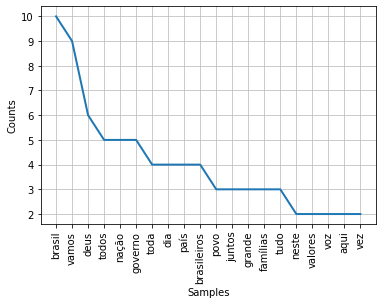

In [15]:
# Gráfico de distribuiçao de palavras
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

In [16]:
# Wordcloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(tokenized_word_3))
img.to_file('worcloud.jpeg')